In [281]:
from sklearn import linear_model as lm
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


data2 = pd.read_csv("e_car_data.csv", delimiter=',', usecols=(0, 4, 7, 9, 8))
data2 = data2[['tier', 'amount', 'apr','prime','accept']]
data2.head(5)


,tier,amount,apr,prime,accept
0,2,21000.00,6.19,1.8388,0
1,4,18888.75,7.99,1.8388,1
2,1,35000.00,5.85,1.8388,0
3,2,16510.00,6.19,1.8388,1
4,1,27000.00,5.85,1.8388,0


In [195]:
data2 = np.array(data2)
x = data2[:, :4]
y = data2[:, 4]

In [196]:
#Create an object of class LogisticRegression
logistic=lm.LogisticRegression()

#Use the fit member function to fit a logistic regression
logistic.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [197]:
print("intercept = ", logistic.intercept_)

intercept =  [0.04303756]


In [198]:
print("coefficients = ", logistic.coef_)

coefficients =  [[ 3.99053530e-02 -5.29466457e-05  9.39824417e-02  5.01993799e-02]]


Error probability of logistic classifier(in-sample): 0.389
RMSE of logistic prediction of probability is:  0.472


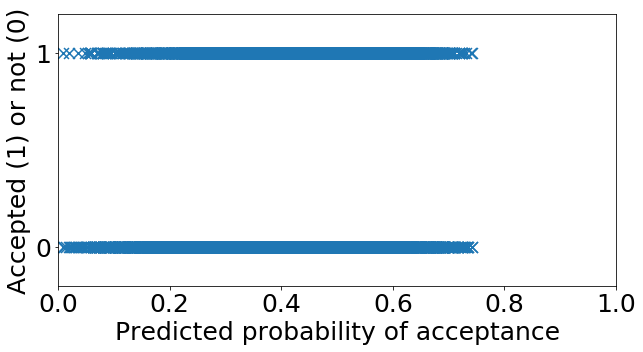

In [199]:
#Output the intercept and coefficient found here
ypred=logistic.predict_proba(x)

#A logistic classifier thresholds the prediction probability at 0.5 by default
print("Error probability of logistic classifier(in-sample):", '%.3f'%(1-logistic.score(x,y)))
print("RMSE of logistic prediction of probability is: ", '%.3f'%np.std(y-ypred[:,1]))

#Plot the ground truth vs the predicted probability of acceptance using pyplot
matplotlib.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,5))
plt.scatter(ypred[:,1], y, marker = 'x', s = 120.)
plt.xlim(0, 1)
plt.ylim(-0.2, 1.2)
plt.yticks([0,1])
plt.xlabel('Predicted probability of acceptance')
plt.ylabel('Accepted (1) or not (0)')
plt.show()

In [261]:
ypred

array([[0.57809874, 0.42190126],
       [0.48855466, 0.51144534],
       [0.75548546, 0.24451454],
       ...,
       [0.41233382, 0.58766618],
       [0.67687168, 0.32312832],
       [0.76035998, 0.23964002]])

In [296]:
ypred
ypred1 = ypred[:,1]

In [365]:
bin1 = ypred1[ 0.2 > ypred1]
len(bin1)

1018

In [366]:
bin11 = y[0.2 > ypred1]
sum(bin11)

164.0

In [367]:
bin2 = ypred1[np.logical_and(0.2 <= ypred1, ypred1 < 0.4)]
len(bin2)

9212

In [368]:
bin22 = y[np.logical_and(0.2 <= ypred1, ypred1 < 0.4)]
sum(bin22)

2745.0

In [369]:
bin3 = ypred1[np.logical_and(0.4 <= ypred1, ypred1 < 0.6)]
len(bin3)

9513

In [370]:
bin33 = y[np.logical_and(0.4 <= ypred1, ypred1 < 0.6)]
sum(bin33)

5918.0

In [371]:
bin4 = ypred1[np.logical_and(0.6 <= ypred1, ypred1 < 0.8)]
len(bin4)

1036

In [314]:
bin44 = y[np.logical_and(0.6 <= ypred1, ypred1 < 0.8)]
sum(bin44)

536.0

In [372]:
bin5 = ypred1[np.logical_and(0.8 <= ypred1, ypred1 < 1)]
len(bin5)

0

In [373]:
bin55 = y[np.logical_and(0.8 <= ypred1, ypred1 < 1)]
sum(bin55)

0

In [374]:
percents = np.ones(5)
percents[0] = sum(bin11)/len(bin1)
percents[1] = sum(bin22)/len(bin2)
percents[2] = sum(bin33)/len(bin3)
percents[3] = sum(bin44)/len(bin4)
percents[4] = 0
percents

array([0.1611002 , 0.29798089, 0.62209608, 0.51737452, 0.        ])

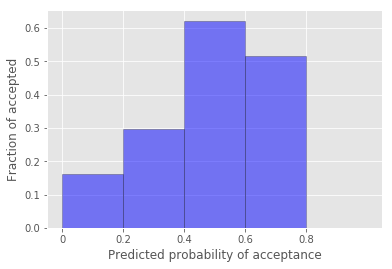

In [403]:
x1 = ('0','0.2','0.4','0.6','0.8')
y1 = percents
x2 = np.arange(len(x1)) 
plt.bar(x2, y1, width = 1, align='edge', alpha=0.5, color='blue', edgecolor='black')
plt.xticks(x2, x1)
plt.xlabel('Predicted probability of acceptance')
plt.ylabel('Fraction of accepted')
 
plt.show()

In [346]:
cs1 = 1/(1 + 2.71828 ** -(0.04303756 + 3.99053530e-02*2 -5.29466457e-05*18000 + 9.39824417e-02*5 + 5.01993799e-02*2.13))
cs1

0.4369980648565954

In [345]:
cs2 = 1/(1 + 2.71828 ** -(0.04303756 + 3.99053530e-02*2 -5.29466457e-05*30000 + 9.39824417e-02*5 + 5.01993799e-02*2.13))
cs2

0.29137536252413976

In [389]:
#same but with the formula
cs11=np.array([[2, 18000, 5, 2.13]])
ypredcs11=logistic.predict_proba(cs11)[:,1]
ypredcs11

array([0.43699802])

In [390]:
#same but with the formula
cs22=np.array([[2, 30000, 5, 2.13]])
ypredcs22=logistic.predict_proba(cs22)[:,1]
ypredcs22


array([0.29137524])